In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [258]:
df = pd.read_csv(r'C:\Users\jodhi\Documents\RAKAMIN ACADEMY\JAP\Mini Project\Miniproject 2 Investigate Hotel Business using Data Visualization\hotel_bookings_data.csv')
df.head(5).T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2017,2017,2017,2017,2017
arrival_date_month,September,September,September,September,September
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_weekdays_nights,0,0,1,1,2
adults,2,2,1,1,2


# EDA

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [260]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [261]:
df.describe(include=['object'])

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


In [262]:
for i in df.select_dtypes(include='object'):
    print(df[i].value_counts())

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64
Kota Denpasar              48590
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743

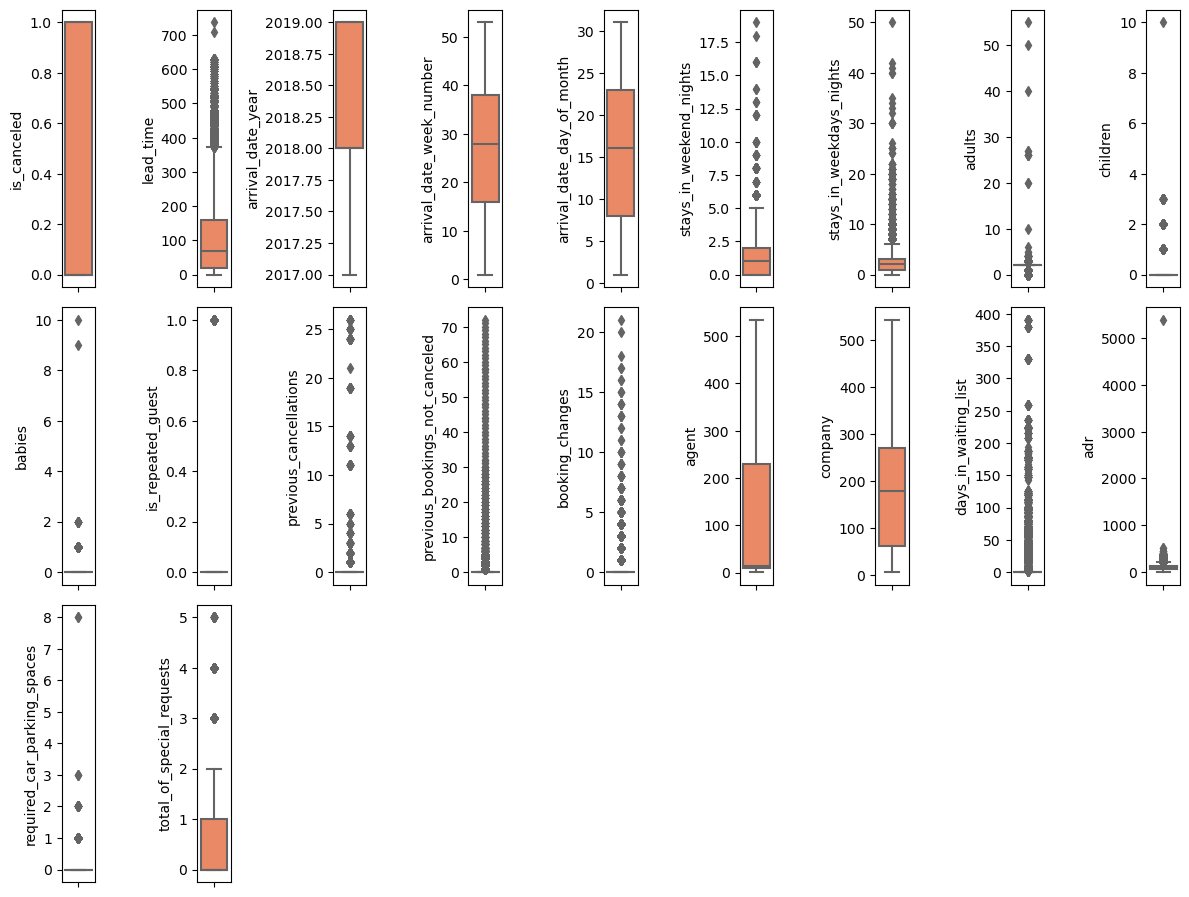

In [263]:
plt.figure(figsize=(12,12))
for i in range(len(numeric)):
    plt.subplot(4,9, i+1)
    sns.boxplot(data=df, y=numeric[i], color='coral')
    plt.tight_layout()

## HANDLING MISSING VALUE

In [264]:
sum_null = df.isna().sum()
null_ratio = df.isna().sum() / len(df) * 100
df_null = pd.DataFrame(data=sum_null, index=df.columns).reset_index()
df_null.columns = ['column','total_null']
df_null['ratio']  = null_ratio.values
df_null['dtype'] = df.dtypes.values
df_null

,column,total_null,ratio,dtype
0,hotel,0,0.000000,object
1,is_canceled,0,0.000000,int64
2,lead_time,0,0.000000,int64
3,arrival_date_year,0,0.000000,int64
4,arrival_date_month,0,0.000000,object
5,arrival_date_week_number,0,0.000000,int64
6,arrival_date_day_of_month,0,0.000000,int64
7,stays_in_weekend_nights,0,0.000000,int64
8,stays_in_weekdays_nights,0,0.000000,int64
9,adults,0,0.000000,int64


In [265]:
# Drop NaN missing value 'City' & 'children'
df = df.dropna(subset=['city'])
df = df.dropna(subset=['children'])
# Fill NaN 'agent' with median, because skewed distribution
df['agent']=df['agent'].fillna(df['agent'].median)
# Remove delete 'company', because missing values is too high
df = df.drop(['company'], axis=1)

In [266]:
sum_null = df.isna().sum()
null_ratio = df.isna().sum() / len(df) * 100
df_null = pd.DataFrame(data=sum_null, index=df.columns).reset_index()
df_null.columns = ['column','total_null']
df_null['ratio']  = null_ratio.values
df_null['dtype'] = df.dtypes.values
df_null

,column,total_null,ratio,dtype
0,hotel,0,0.0,object
1,is_canceled,0,0.0,int64
2,lead_time,0,0.0,int64
3,arrival_date_year,0,0.0,int64
4,arrival_date_month,0,0.0,object
5,arrival_date_week_number,0,0.0,int64
6,arrival_date_day_of_month,0,0.0,int64
7,stays_in_weekend_nights,0,0.0,int64
8,stays_in_weekdays_nights,0,0.0,int64
9,adults,0,0.0,int64


**Replace values ​​that have the same meaning**

In [267]:
print("Value Counts Before Replace\n\n",df['meal'].value_counts())
df['meal'] = df['meal'].replace('Undefined','No Meal')
print("\n\nValue Counts Before Replace\n\n",df['meal'].value_counts())

Value Counts Before Replace

 Breakfast     91863
Dinner        14434
No Meal       10638
Undefined      1165
Full Board      798
Name: meal, dtype: int64


Value Counts Before Replace

 Breakfast     91863
Dinner        14434
No Meal       11803
Full Board      798
Name: meal, dtype: int64


In [273]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

**Discard Unnecessary Data**

In [270]:
# total_guests = adults, children, babies
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_guests'] = df['total_guests'].astype('int64')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,<bound method NDFrame._add_numeric_operations....,0,Personal,0.00,0,0,Check-Out,2
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,<bound method NDFrame._add_numeric_operations....,0,Personal,0.00,0,0,Check-Out,2
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,<bound method NDFrame._add_numeric_operations....,0,Personal,75.00,0,0,Check-Out,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,0,Personal,75.00,0,0,Check-Out,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,0,Personal,98.00,0,1,Check-Out,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,No Deposit,394.0,0,Personal,96.14,0,0,Check-Out,2
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,No Deposit,9.0,0,Personal,225.43,0,2,Check-Out,3
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0,No Deposit,9.0,0,Personal,157.71,0,4,Check-Out,2
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,No Deposit,89.0,0,Personal,104.40,0,0,Check-Out,2
